In [12]:
import numpy as np
import pandas as pd
from seaborn import boxplot
from scipy.stats import ttest_ind

def PermTest(Treatment, Control):
    t_obs = np.abs(np.mean(Treatment) - np.mean(Control))

    B = 10000
    
    combined = np.append(Treatment, Control)
    
    ell = np.zeros(B)
    
    for i in range(0,B):
       tmp =  np.random.permutation(combined)
       t_tmp = tmp[0:Treatment.shape[0]]
       c_tmp = tmp[Treatment.shape[0]:combined.shape[0]]
       dif =  np.abs(np.mean(t_tmp) - np.mean(c_tmp))
       if(dif>t_obs):
           ell[i]=1
           
    ell_mean = np.mean(ell)  
    ell_std  = np.std(ell)  
    print("p-val=",ell_mean, " p_value 95% CI = [",ell_mean - 1.96*ell_std/np.sqrt(B), 
                             " , ", ell_mean + 1.96*ell_std/np.sqrt(B),"]")  

In [15]:
# load data
ds = pd.read_csv("student_data.csv")

# create new dataset
df = ds.loc[:,['gender','GPA']]

# set categorical type for gender
df.gender = df.gender.astype('category')
df.head()

,gender,GPA
0,F,6.24
1,F,2.65
2,M,5.48
3,M,4.87
4,M,3.68


In [16]:
#Plot the GPA as a function of gender
print("F")
print(df.GPA[df.gender=="F"].describe())
print("-----------------------------------------")
print("M")
print(df.GPA[df.gender=="M"].describe())
print("-----------------------------------------")

F
count    407.000000
mean       4.607543
std        1.445800
min        1.040000
25%        3.530000
50%        4.780000
75%        5.770000
max        6.990000
Name: GPA, dtype: float64
-----------------------------------------
M
count    429.000000
mean       4.477063
std        1.423529
min        1.100000
25%        3.460000
50%        4.650000
75%        5.630000
max        6.960000
Name: GPA, dtype: float64
-----------------------------------------


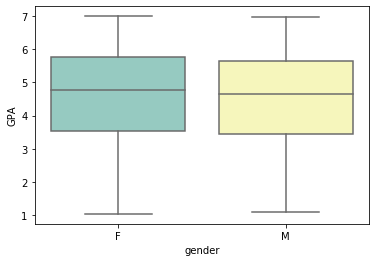

In [17]:
boxplot(x="gender", y="GPA",  data=df, palette="Set3")

In [18]:
group1 = df.GPA[df.gender=="F"].values
group2 = df.GPA[df.gender=="M"].values

twosample_results  = ttest_ind(group1, group2)
print("sample means=(",np.mean(group1),",", np.mean(group2) ,")",
      " t = ", twosample_results[0], ", p-val = ", twosample_results[1])


sample means=( 4.607542997542997 , 4.477062937062938 )  t =  1.3145964475444059 , p-val =  0.18900695386399316


In [19]:
# permutation test
t_obs = np.abs(np.mean(group1) - np.mean(group2))
PermTest(group1, group2)

p-val= 0.1922  p_value 95% CI = [ 0.18447702396057064  ,  0.19992297603942938 ]
